**Naufal Rasyid S - Internship Project**

# Dataset

In [ ]:
import re
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("/content/tenant_news_sorted_English.csv")

In [ ]:
df.tail()

,Title,Content,Source,Date
113,ETANA AND KPCDI PROVIDE HEALTH EDUCATION: IMPA...,"Jakarta, 4 March 2023 - PT Etana Biotechnologi...",Etana,2023-03-04
114,Traktor Nusantara is Present at the BCA...,"JAKARTA - This year, Traktor Nusantara partici...",Traktor Nusantara,2023-03-01
115,Signing of the PPG and Haleon Distribution Coo...,12 August 2024 12 June 2024 06 June 2024 17 Fe...,Soho Global Health,2023-02-17
116,Enhancing Business Efficiency...,Jakarta (19/1) – Together with the Service and...,Traktor Nusantara,2023-01-19
117,BPOM Releases SOHO’s Traditional Medicinal Syr...,12 August 2024 12 June 2024 06 June 2024 11 Ja...,Soho Global Health,2023-01-11


In [ ]:
from collections import Counter

def most_common_words(df, column, num_words=10):

  # Concatenate all text in a column into one string
  all_text = ' '.join(df[column])

  # Split the text into a list of words
  words = all_text.split()

  # Count the frequency of occurrence of each word
  word_counts = Counter(words)

  # Sort the words by frequency and take the one that appears most often
  most_common = word_counts.most_common(num_words)

  return most_common

most_freq_words = most_common_words(df, 'Content', 20)
most_freq_words

[('the', 3487),
 ('and', 2263),
 ('of', 2236),
 ('to', 1785),
 ('in', 1272),
 ('a', 1026),
 ('is', 754),
 ('by', 658),
 ('with', 633),
 ('for', 612),
 ('as', 576),
 ('that', 511),
 ('The', 392),
 ('TRAKNUS', 382),
 ('has', 360),
 ('on', 342),
 ('was', 338),
 ('this', 313),
 ('from', 289),
 ('at', 273)]

In [ ]:
# Merge all the text in the 'Content' column into one string
all_text = ' '.join(df['Content'])

# Split the text into a list of words
words = all_text.split()

# Count the frequency of occurrence of each word
word_counts = Counter(words)

# Show 10 most frequently occurring words
(word_counts.most_common(20))

[('the', 3487),
 ('and', 2263),
 ('of', 2236),
 ('to', 1785),
 ('in', 1272),
 ('a', 1026),
 ('is', 754),
 ('by', 658),
 ('with', 633),
 ('for', 612),
 ('as', 576),
 ('that', 511),
 ('The', 392),
 ('TRAKNUS', 382),
 ('has', 360),
 ('on', 342),
 ('was', 338),
 ('this', 313),
 ('from', 289),
 ('at', 273)]

In [ ]:
df.shape

(118, 4)

In [ ]:
df['Source'].value_counts()

,count
Source,
Traktor Nusantara,82
Soho Global Health,20
Etana,16


In [ ]:
df.isna().sum()

,0
Title,0
Content,0
Source,0
Date,0


In [ ]:
for sentence in df['Title']:
    print(sentence)

ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN INDONESIA THROUGH COLLABORATION WITH BEIGENE
Genba CHCD 2024 at TRAKNUS
TRAKNUS Group National Management Meetin...
TRAKNUS Group Achieves 3 Bronze Winners...
TRAKNUS Shows Concern Through Blood Dona...
TRAKNUS Padang Strengthens Emergency Res...
ETANA AND CELLTRION SIGN STRATEGIC AGREEMENT FOR HERZUMA® AND TRUXIMA®
TRAKNUS Mengajar Support Vocational Educ...
TRAKNUS Builds Safety Awareness
Traktor Nusantara Gives MSME Training in...
TRAKNUS Innovation Convention 2024 Solid...
TRAKNUS Cares in Blood Donatio...
TRAKNUS Enhances Earthquake Emergency Re...
TRAKNUS Group Celebrates  The 79th Indep...
Grand Opening of TRAKNUS Employee Consum...
PT Parit Padang Global (PPG) Signs Distribution Agreement with PT Keva Cosmetics International (Brand: ESQA)
TRAKNUS I-Share 2024 Innovation Inspirat...
TRAKNUS Retains ISO 9001: 2015 Certifica...
TRAKNUS Group Holds Kick Off of SOP Repr...
Employee Consumer Cooperative: TRAKNUS C...
TRAKNUS Towards Opera

In [ ]:
for sentence in df['Content']:
    print(sentence)

Jakarta, December 10, 2024 – PT Etana Biotechnologies Indonesia (Etana), an Indonesian biopharmaceutical company, has obtained marketing authorization for two innovative cancer therapies, Tislelizumab (ETAPIDI®) and Zanubrutinib (BRUKINSA®).  Developed by BeiGene, which plans to change its name to BeOne Medicines, a global oncology leader committed to making cutting-edge and accessible treatments available worldwide, these therapies are set to transform cancer care in Indonesia by combining global advancements with local accessibility. The marketing authorizations were formally handed over by Dr. Taruna Ikrar, Head of the Indonesian Food and Drug Authority (BPOM), in the presence of key government officials, including Dita Novianti Sugandi Argadiredja, S.Si.,apt.,MM, Director of Pharmaceuticals Production and Distribution at the Indonesian Ministry of Health. Dr. Taruna Ikrar stated, "These two targeted therapies meet the drug safety and efficacy requirements set by BPOM, ensuring prod

In [ ]:
# Check for duplicates in the Content column
duplicates = df[df['Content'].duplicated(keep=False)]

print("Duplicate rows in Content column:")
print(duplicates)

Duplicate rows in Content column:
                                                Title  \
60  ETANA ESTABLISHES STRATEGIC COOPERATION WITH B...   
61  ETANA ESTABLISHES STRATEGIC COOPERATION WITH B...   
79  ETANA'S MRNA VACCINE PRODUCTION FACILITY RECEI...   
80  ETANA'S MRNA VACCINE PRODUCTION FACILITY RECEI...   
85  ETANA STRENGTHENS BIOPHARMACEUTICAL COOPERATIO...   
86  ETANA STRENGTHENS BIOPHARMACEUTICAL COOPERATIO...   
91  ETANA STRENGTHENS COOPERATION WITH BRIN AND UN...   
92  ETANA STRENGTHENS COOPERATION WITH BRIN AND UN...   
94  ETANA WITH DKI JAKARTA HEALTH OFFICE HELD HEAL...   
95  ETANA WITH DKI JAKARTA HEALTH OFFICE HELD HEAL...   

                                              Content Source        Date  
60  Jakarta, 29 January 2024 – PT Etana Biotechnol...  Etana  2024-01-29  
61  Jakarta, 29 January 2024 – PT Etana Biotechnol...  Etana  2024-01-29  
79  Jakarta, 25 October 2023 – PT Etana Biotechnol...  Etana  2023-10-25  
80  Jakarta, 25 October 2023 – PT Etan

In [ ]:
# Drop duplicates while keeping the first occurrence
df = df.drop_duplicates(subset=['Content'], keep='first')

print("Dataset after removing duplicates:")
print(df)

Dataset after removing duplicates:
                                                 Title  \
0    ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN ...   
1                           Genba CHCD 2024 at TRAKNUS   
2          TRAKNUS Group National Management Meetin...   
3           TRAKNUS Group Achieves 3 Bronze Winners...   
4          TRAKNUS Shows Concern Through Blood Dona...   
..                                                 ...   
113  ETANA AND KPCDI PROVIDE HEALTH EDUCATION: IMPA...   
114         Traktor Nusantara is Present at the BCA...   
115  Signing of the PPG and Haleon Distribution Coo...   
116                   Enhancing Business Efficiency...   
117  BPOM Releases SOHO’s Traditional Medicinal Syr...   

                                               Content              Source  \
0    Jakarta, December 10, 2024 – PT Etana Biotechn...               Etana   
1    Traktor Nusantara (TRAKNUS) welcomed the arriv...   Traktor Nusantara   
2    With the theme “The Best Indu

In [ ]:
# Verify no duplicates remain
if df['Content'].duplicated().sum() == 0:
    print("No duplicates remain in the Content column. The dataset is clean.")
else:
    print("Duplicates still exist. Check your data or logic.")

No duplicates remain in the Content column. The dataset is clean.


# Data Cleaning

In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=4478277e81b1924a6107c97a71eeac9fb49eb706ee8343c96deb1f653747b961
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Success

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=74a21babadb94966cb070583d117d46052d7b9ca06fb8fa68b4093962d5c2e2e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from googletrans import Translator
import langdetect

In [ ]:
# Combine the 'title' and 'content' columns
df['combined_text'] = df['Title'] + " " + df['Content']

In [ ]:
df.head()

,Title,Content,Source,Date,combined_text
0,ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN ...,"Jakarta, December 10, 2024 – PT Etana Biotechn...",Etana,2024-12-10,ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN ...
1,Genba CHCD 2024 at TRAKNUS,Traktor Nusantara (TRAKNUS) welcomed the arriv...,Traktor Nusantara,2024-12-10,Genba CHCD 2024 at TRAKNUS Traktor Nusantara (...
2,TRAKNUS Group National Management Meetin...,With the theme “The Best Industrial & Agricult...,Traktor Nusantara,2024-12-09,TRAKNUS Group National Management Meetin... Wi...
3,TRAKNUS Group Achieves 3 Bronze Winners...,Traktor Nusantara (TRAKNUS) Group again record...,Traktor Nusantara,2024-12-06,TRAKNUS Group Achieves 3 Bronze Winners... Tra...
4,TRAKNUS Shows Concern Through Blood Dona...,Traktor Nusantara (TRAKNUS) Group reaffirmed i...,Traktor Nusantara,2024-12-02,TRAKNUS Shows Concern Through Blood Dona... Tr...


GOOGLE TRANSLATOR

In [ ]:
# Initialize Google Translator and lemmatizer
translator = Translator()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def translate_to_english(text):
    """
    Translate text to English if detected as Indonesian.
    """
    if not isinstance(text, str):  # Handle NaN or non-string values
        return ""
    try:
        if langdetect.detect(text) == 'id':
            return translator.translate(text, src='id', dest='en').text
        return text
    except Exception as e:
        print(f"Translation failed for text: {text[:50]}... Error: {e}")
        return text

def clean_and_tokenize_text(text):
    """
    Preprocess text: clean, tokenize, lemmatize, and remove stopwords.
    """
    if not isinstance(text, str):  # Handle NaN or non-string values
        return []

    # Remove URLs, numbers, and special characters
    text = re.sub(r'http\S+|www\S+|com|https', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces

    # Convert to lowercase
    text = text.lower()

    #  Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return tokens


df['processed_text'] = df['combined_text'].apply(translate_to_english)
df['processed_text'] = df['processed_text'].apply(clean_and_tokenize_text)

In [ ]:
df.head()

,Title,Content,Source,Date,combined_text,processed_text
0,ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN ...,"Jakarta, December 10, 2024 – PT Etana Biotechn...",Etana,2024-12-10,ETANA LAUNCHES INNOVATIVE CANCER THERAPIES IN ...,"[etana, launch, innovative, cancer, therapy, i..."
1,Genba CHCD 2024 at TRAKNUS,Traktor Nusantara (TRAKNUS) welcomed the arriv...,Traktor Nusantara,2024-12-10,Genba CHCD 2024 at TRAKNUS Traktor Nusantara (...,"[genba, chcd, traknus, traktor, nusantara, tra..."
2,TRAKNUS Group National Management Meetin...,With the theme “The Best Industrial & Agricult...,Traktor Nusantara,2024-12-09,TRAKNUS Group National Management Meetin... Wi...,"[traknus, group, national, management, meetin,..."
3,TRAKNUS Group Achieves 3 Bronze Winners...,Traktor Nusantara (TRAKNUS) Group again record...,Traktor Nusantara,2024-12-06,TRAKNUS Group Achieves 3 Bronze Winners... Tra...,"[traknus, group, achieves, bronze, winner, tra..."
4,TRAKNUS Shows Concern Through Blood Dona...,Traktor Nusantara (TRAKNUS) Group reaffirmed i...,Traktor Nusantara,2024-12-02,TRAKNUS Shows Concern Through Blood Dona... Tr...,"[traknus, show, concern, blood, dona, traktor,..."


In [ ]:
for sentence in df['processed_text']:
    print(sentence)

['etana', 'launch', 'innovative', 'cancer', 'therapy', 'indonesia', 'collaboration', 'beigene', 'jakarta', 'december', 'pt', 'etana', 'biotechnology', 'indonesia', 'etana', 'indonesian', 'biopharmaceutical', 'pany', 'ha', 'obtained', 'marketing', 'authorization', 'two', 'innovative', 'cancer', 'therapy', 'tislelizumab', 'etapidi', 'zanubrutinib', 'brukinsa', 'developed', 'beigene', 'plan', 'change', 'name', 'beone', 'medicine', 'global', 'oncology', 'leader', 'mitted', 'making', 'cuttingedge', 'accessible', 'treatment', 'available', 'worldwide', 'therapy', 'set', 'transform', 'cancer', 'care', 'indonesia', 'bining', 'global', 'advancement', 'local', 'accessibility', 'marketing', 'authorization', 'formally', 'handed', 'dr', 'taruna', 'ikrar', 'head', 'indonesian', 'food', 'drug', 'authority', 'bpom', 'presence', 'key', 'government', 'official', 'including', 'dita', 'novianti', 'sugandi', 'argadiredja', 'ssiaptmm', 'director', 'pharmaceutical', 'production', 'distribution', 'indonesian',

Double Check

In [ ]:
#Double check untuk memastikan text sudah bersih
from collections import Counter

# Flatten token list and calculate word frequencies
all_tokens = [token for tokens in df['processed_text'] for token in tokens]
word_counts = Counter(all_tokens)

# Display the top 50 most common words
print(word_counts.most_common(100))

[('traknus', 556), ('ha', 347), ('wa', 333), ('pt', 287), ('health', 264), ('indonesia', 255), ('product', 245), ('head', 220), ('also', 206), ('nusantara', 206), ('traktor', 205), ('event', 183), ('activity', 179), ('soho', 179), ('business', 174), ('global', 163), ('service', 160), ('etana', 157), ('innovation', 157), ('pany', 152), ('group', 151), ('branch', 151), ('sustainable', 144), ('management', 142), ('customer', 142), ('ppg', 138), ('program', 131), ('development', 128), ('indonesian', 127), ('support', 123), ('jakarta', 117), ('distribution', 111), ('director', 108), ('team', 107), ('market', 106), ('year', 105), ('held', 104), ('environment', 102), ('share', 101), ('quality', 100), ('collaboration', 97), ('worker', 97), ('participant', 96), ('value', 96), ('sustainability', 95), ('various', 92), ('well', 91), ('need', 90), ('cooperation', 88), ('award', 88), ('said', 87), ('office', 87), ('process', 87), ('patient', 86), ('including', 83), ('change', 82), ('material', 82), 

Filtering text

In [ ]:
# Define custom words to filter (specific to your needs)
filter_words = {'traknus', 'ha', 'wa', 'pt', 'indonesian', 'nusantara', 'jakarta', 'soho', 'well'
                'one','global','ethane', 'etana', 'ppg', 'traktor', 'nusantara','month', 'january', 'february',
                'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'
                'head', 'also', 'indonesia','beigene','muria','e', 'pertanyaan', 'berdasarkan','traknuss'
                'jawaban yang','dan informasi spesifik pasien','mengajar','david raka budi','mawardi','ps',
                'massey ferguson','tanggung', 'perawatan', 'anda informasi','imelda maria loho','perijinannya',
                'nathan tirtana','donny prakasa', 'david raka', 'eko wasito','share','head','ini'
                }

# Combine all unwanted words into a filter set
# filter_words = custom_filter_words

# Filter function to remove unwanted words
def filter_text(tokens):
    return [word for word in tokens if word not in filter_words]

# Apply filtering to the cleaned 'combined_text' column
df['filtering_text'] = df['processed_text'].apply(filter_text)

In [ ]:
# Flatten token list and calculate word frequencies
all_tokens = [token for tokens in df['filtering_text'] for token in tokens]
word_counts = Counter(all_tokens)

# Display the top 50 most common words
print("Top 50 words):", word_counts.most_common(50))

Top 50 words): [('health', 264), ('product', 245), ('event', 183), ('activity', 179), ('business', 174), ('service', 160), ('innovation', 157), ('pany', 152), ('group', 151), ('branch', 151), ('sustainable', 144), ('management', 142), ('customer', 142), ('program', 131), ('development', 128), ('support', 123), ('distribution', 111), ('director', 108), ('team', 107), ('market', 106), ('year', 105), ('held', 104), ('environment', 102), ('quality', 100), ('collaboration', 97), ('worker', 97), ('participant', 96), ('value', 96), ('sustainability', 95), ('various', 92), ('well', 91), ('need', 90), ('cooperation', 88), ('award', 88), ('said', 87), ('office', 87), ('process', 87), ('patient', 86), ('including', 83), ('change', 82), ('material', 82), ('one', 81), ('provide', 80), ('marketing', 79), ('part', 79), ('international', 77), ('therapy', 76), ('sale', 76), ('namely', 76), ('biopharmaceutical', 74)]


In [ ]:
for sentence in df['filtering_text']:
    print(sentence)

['launch', 'innovative', 'cancer', 'therapy', 'collaboration', 'december', 'biotechnology', 'biopharmaceutical', 'pany', 'obtained', 'marketing', 'authorization', 'two', 'innovative', 'cancer', 'therapy', 'tislelizumab', 'etapidi', 'zanubrutinib', 'brukinsa', 'developed', 'plan', 'change', 'name', 'beone', 'medicine', 'oncology', 'leader', 'mitted', 'making', 'cuttingedge', 'accessible', 'treatment', 'available', 'worldwide', 'therapy', 'set', 'transform', 'cancer', 'care', 'bining', 'advancement', 'local', 'accessibility', 'marketing', 'authorization', 'formally', 'handed', 'dr', 'taruna', 'ikrar', 'food', 'drug', 'authority', 'bpom', 'presence', 'key', 'government', 'official', 'including', 'dita', 'novianti', 'sugandi', 'argadiredja', 'ssiaptmm', 'director', 'pharmaceutical', 'production', 'distribution', 'ministry', 'health', 'dr', 'taruna', 'ikrar', 'stated', 'two', 'targeted', 'therapy', 'meet', 'drug', 'safety', 'efficacy', 'requirement', 'set', 'bpom', 'ensuring', 'product', 'q

In [ ]:
# Create a new dataframe that only contain required columns
df_fix = df[['filtering_text', 'Source']]
df_fix

,filtering_text,Source
0,"[launch, innovative, cancer, therapy, collabor...",Etana
1,"[genba, chcd, weled, arrival, astras, corporat...",Traktor Nusantara
2,"[group, national, management, meetin, theme, b...",Traktor Nusantara
3,"[group, achieves, bronze, winner, group, recor...",Traktor Nusantara
4,"[show, concern, blood, dona, group, reaffirmed...",Traktor Nusantara
...,...,...
113,"[kpcdi, provide, health, education, impact, tr...",Etana
114,"[present, bca, year, participated, exhibition,...",Traktor Nusantara
115,"[signing, haleon, distribution, cooperation, a...",Soho Global Health
116,"[enhancing, business, efficiency, together, se...",Traktor Nusantara


In [ ]:
df_fix.to_csv('df_fix_cleaned.csv', index=False)

# Vectorize + LDA + NER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import ParameterGrid
import spacy

In [ ]:
# Select the desired columns
df_fix1 = df_fix[['filtering_text', 'Source']]
df_fix1

,filtering_text,Source
0,"[launch, innovative, cancer, therapy, collabor...",Etana
1,"[genba, chcd, weled, arrival, astras, corporat...",Traktor Nusantara
2,"[group, national, management, meetin, theme, b...",Traktor Nusantara
3,"[group, achieves, bronze, winner, group, recor...",Traktor Nusantara
4,"[show, concern, blood, dona, group, reaffirmed...",Traktor Nusantara
...,...,...
113,"[kpcdi, provide, health, education, impact, tr...",Etana
114,"[present, bca, year, participated, exhibition,...",Traktor Nusantara
115,"[signing, haleon, distribution, cooperation, a...",Soho Global Health
116,"[enhancing, business, efficiency, together, se...",Traktor Nusantara


In [ ]:
df_fix1

,filtering_text,Source
0,"[launch, innovative, cancer, therapy, collabor...",Etana
1,"[genba, chcd, weled, arrival, astras, corporat...",Traktor Nusantara
2,"[group, national, management, meetin, theme, b...",Traktor Nusantara
3,"[group, achieves, bronze, winner, group, recor...",Traktor Nusantara
4,"[show, concern, blood, dona, group, reaffirmed...",Traktor Nusantara
...,...,...
113,"[kpcdi, provide, health, education, impact, tr...",Etana
114,"[present, bca, year, participated, exhibition,...",Traktor Nusantara
115,"[signing, haleon, distribution, cooperation, a...",Soho Global Health
116,"[enhancing, business, efficiency, together, se...",Traktor Nusantara


In [ ]:
# Check dataset
print("Dataset Check:")
print(f"Number of Columns in Dataset: {df_fix1.shape[1]}")
print(f"Number of Rows in Dataset: {len(df_fix1)}")
print(f"Sample Data: {df_fix['filtering_text'].head()}")

Dataset Check:
Number of Columns in Dataset: 2
Number of Rows in Dataset: 113
Sample Data: 0    [launch, innovative, cancer, therapy, collabor...
1    [genba, chcd, weled, arrival, astras, corporat...
2    [group, national, management, meetin, theme, b...
3    [group, achieves, bronze, winner, group, recor...
4    [show, concern, blood, dona, group, reaffirmed...
Name: filtering_text, dtype: object


Vectorize

In [ ]:
# Convert lists of tokens into space-separated strings
df_fix1['filtering_text'] = df_fix1['filtering_text'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else x
)

In [ ]:
 df_fix1['filtering_text'] = df_fix1['filtering_text'].dropna().tolist()

In [ ]:
# Prepare tokenized texts for Gensim
tokenized_texts = [doc.split() for doc in df_fix1['filtering_text']]  # Tokenize text
dictionary = Dictionary(tokenized_texts)  # Create Gensim dictionary

# Function to extract topics from sklearn LDA model
def extract_topics_from_sklearn_lda(lda_model, feature_names, no_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Function to compute coherence score
def compute_coherence(cv_params):
    count_vectorizer = CountVectorizer(**cv_params, stop_words='english', lowercase=True)
    count_matrix = count_vectorizer.fit_transform(df_fix1['filtering_text'])

    # Skip sparse matrices
    if count_matrix.shape[1] == 0:
        return -1, None, None

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=5, learning_decay=0.8, learning_method='batch')
    lda.fit(count_matrix)

    # Extract topics
    feature_names = count_vectorizer.get_feature_names_out()
    topics = extract_topics_from_sklearn_lda(lda, feature_names)

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score, count_vectorizer, lda

# Define parameter grid for CountVectorizer
param_grid = {
    'max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 1.0],
    'min_df': [2, 3, 4, 5, 6],
    'max_features': [50, 60, 70, 80, 90, 100, 120, 130, 140, 150, 200],
    'ngram_range': [(1, 1), (1, 2)],
}

# Perform grid search over CountVectorizer parameters
best_score = -1
best_params = None
best_count_vectorizer = None
best_lda = None

for params in ParameterGrid(param_grid):
    score, count_vectorizer, lda = compute_coherence(params)
    if score > best_score:
        best_score = score
        best_params = params
        best_count_vectorizer = count_vectorizer
        best_lda = lda

# Display the results of grid search
print("Best CountVectorizer Parameters:", best_params)

# Evaluate the best model
count_matrix = best_count_vectorizer.transform(df_fix1['filtering_text'])
print(f"Best Coherence Score: {best_score:.4f}")
print(f"\nPerplexity: {best_lda.perplexity(count_matrix):.4f}")
print("Log Likelihood:", best_lda.score(count_matrix))

# Extract and display the vocabulary and topics
if best_count_vectorizer and best_lda:
    best_features = best_count_vectorizer.get_feature_names_out()
    best_topics = extract_topics_from_sklearn_lda(best_lda, best_features)

    print("\nBest Features (Top 10):", best_features[:10])
    print("\nBest Topics:")
    for i, topic in enumerate(best_topics):
        print(f"Topic {i + 1}: {', '.join(topic)}")

Best CountVectorizer Parameters: {'max_df': 0.9, 'max_features': 70, 'min_df': 2, 'ngram_range': (1, 1)}
Best Coherence Score: 0.6639

Perplexity: 49.4043
Log Likelihood: -27300.266849150627

Best Features (Top 10): ['able' 'activity' 'agreement' 'annual' 'astra' 'award' 'best'
 'biopharmaceutical' 'blood' 'branch']

Best Topics:
Topic 1: health, sustainable, product, report, annual, environment, result, change, success, long
Topic 2: innovation, service, customer, product, award, handling, business, material, quality, event
Topic 3: distribution, agreement, cooperation, product, sale, marketing, sustainable, health, team, business
Topic 4: patient, therapy, biopharmaceutical, research, product, production, pany, innovative, development, leading
Topic 5: activity, group, event, branch, worker, business, sustainability, management, held, office


In [ ]:
# Extract top terms for each document using COUNT VECT
def get_top_terms_per_doc(count_matrix, best_features, top_n=5):
    """Get top terms per document based on COUNT VECT scores."""
    top_terms = []
    for row in count_matrix:
        top_indices = row.indices[np.argsort(row.data)[-top_n:][::-1]]
        terms = [(best_features[i], row[0, i]) for i in top_indices]
        top_terms.append(terms)
    return top_terms

top_terms_per_doc = get_top_terms_per_doc(count_matrix, best_count_vectorizer.get_feature_names_out())

# Extract Named Entities using SpaCy
def extract_entities(text, nlp_model, entity_labels=["ORG", "PERSON", "MONEY", "GPE"]):
    """Extract named entities from text using SpaCy."""
    doc = nlp_model(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in entity_labels]
    return entities

nlp = spacy.load("en_core_web_sm")
df_fix1['entities'] = df_fix1['filtering_text'].apply(lambda x: extract_entities(x, nlp))

# Combine outputs to generate insights
insights = {}
for index, row in df_fix1.iterrows():
    text = row['filtering_text']
    source = row['Source']

    if not text:
        continue  # Skip empty text

    # LDA Topic for the document
    lda_transformed = best_lda.transform(best_count_vectorizer.transform([text]))
    dominant_topic_idx = np.argmax(lda_transformed, axis=1)[0]
    dominant_topic = f"Topic {dominant_topic_idx + 1}"
    topic_probs = lda_transformed[0]  # Probabilities for each topic
    keywords = best_topics[dominant_topic_idx]

    # NER Entities
    entities = [ent for ent, label in row['entities']]

    # Initialize tenant insights
    if source not in insights:
        insights[source] = {
            "documents": [],
            "dominant_topics": set(),
            "topic_probs": [],
            "entities": [],
            "keywords": set(),
        }

    insights[source]["documents"].append(text)
    insights[source]["dominant_topics"].add(dominant_topic)
    insights[source]["topic_probs"].append(topic_probs)
    insights[source]["entities"].extend(entities)
    insights[source]["keywords"].update(keywords)

# Display Results
print("Topics Identified:")
for i, topic in enumerate(best_topics):
    print(f"Topic {i + 1}: {', '.join(topic)}")

print("\nTenant Insights:")
for tenant, info in insights.items():
    print(f"\nTenant: {tenant}")
    print(f"Dominant Topics: {', '.join(info['dominant_topics'])}")
    print(f"Keywords: {', '.join(info['keywords'])}")
    # Uncomment below if you'd like to analyze the entities more closely
    # print(f"Entities: {pd.Series(info['entities']).value_counts().to_dict()}")

    # Analyze topic probabilities
    avg_topic_probs = np.mean(info["topic_probs"], axis=0)
    print(f"Average Topic Probabilities: {avg_topic_probs}")

    # Highlight if one topic dominates
    if max(avg_topic_probs) > 0.8:
        print(f"Note: Tenant '{tenant}' is strongly associated with a single topic.")

Topics Identified:
Topic 1: health, sustainable, product, report, annual, environment, result, change, success, long
Topic 2: innovation, service, customer, product, award, handling, business, material, quality, event
Topic 3: distribution, agreement, cooperation, product, sale, marketing, sustainable, health, team, business
Topic 4: patient, therapy, biopharmaceutical, research, product, production, pany, innovative, development, leading
Topic 5: activity, group, event, branch, worker, business, sustainability, management, held, office

Tenant Insights:

Tenant: Etana
Dominant Topics: Topic 4
Keywords: patient, leading, biopharmaceutical, development, research, therapy, production, pany, innovative, product
Average Topic Probabilities: [0.01500406 0.01676515 0.01282499 0.92534998 0.03005582]
Note: Tenant 'Etana' is strongly associated with a single topic.

Tenant: Traktor Nusantara
Dominant Topics: Topic 5, Topic 2
Keywords: innovation, award, worker, material, management, group, busi

# Visualisasi

Visualizing Top Words for Each Topic:

Visualizing Topic 1:


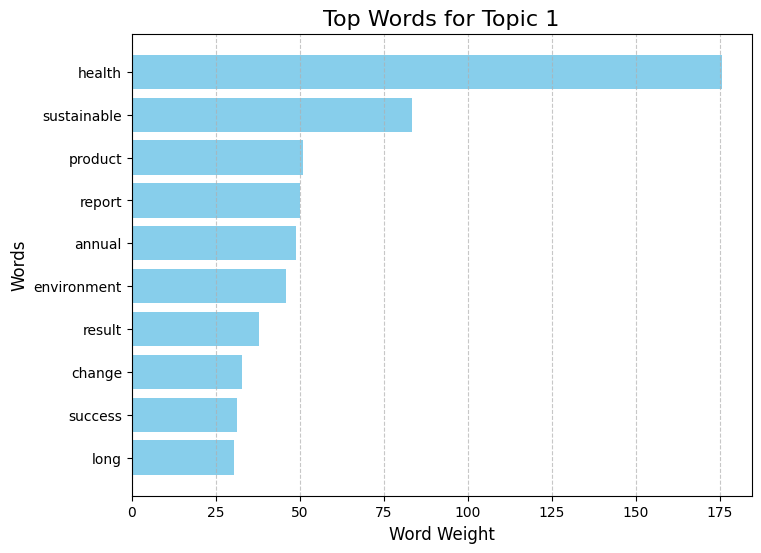


Visualizing Topic 2:


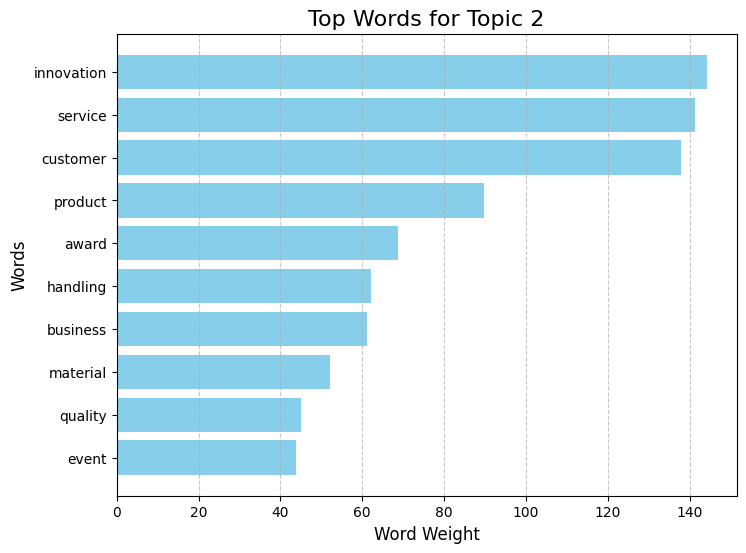


Visualizing Topic 3:


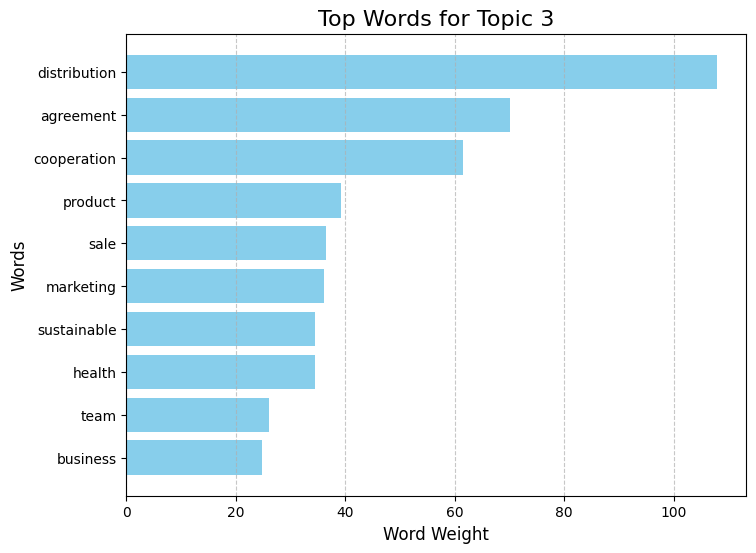


Visualizing Topic 4:


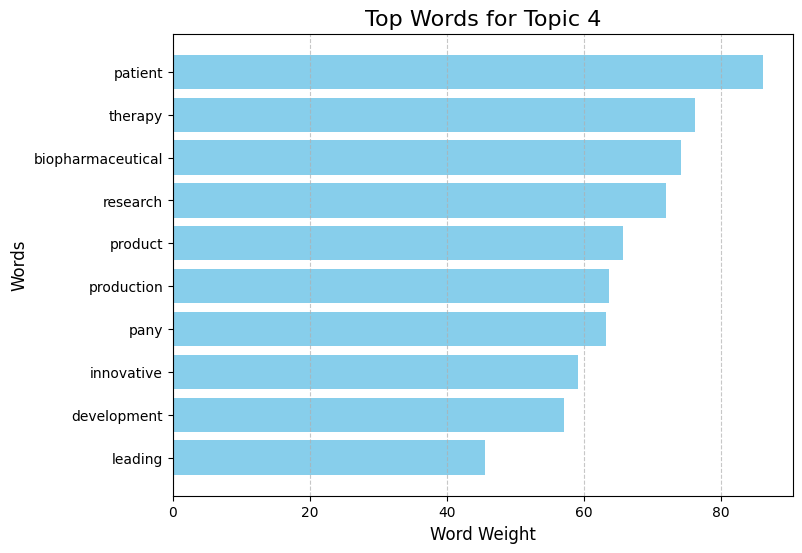


Visualizing Topic 5:


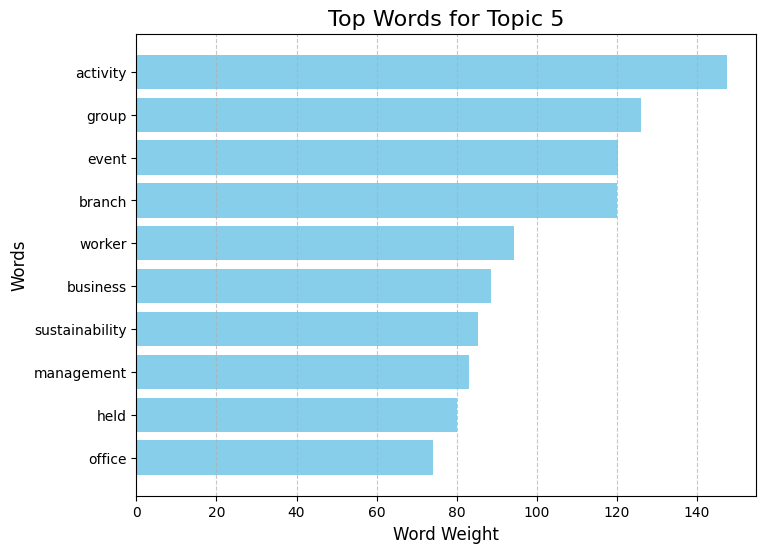

In [ ]:
# Function to get the top words and their weights for a topic
def get_top_words(lda_model, topic_idx, n_top_words, feature_names):
    """Retrieve the top words and their weights for a given topic."""
    top_features_ind = lda_model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = lda_model.components_[topic_idx][top_features_ind]
    return top_features, weights

# Function to create a bar plot for a topic
def make_bar_plot(lda_model, topic_idx, n_top_words, feature_names):
    """Generate a horizontal bar plot for top words in a specific topic."""
    top_features, weights = get_top_words(lda_model, topic_idx, n_top_words, feature_names)

    plt.figure(figsize=(8, 6))
    y_pos = np.arange(len(top_features))
    plt.barh(y_pos, weights, align='center', color='skyblue')
    plt.yticks(y_pos, top_features, fontsize=10)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f"Top Words for Topic {topic_idx + 1}", fontsize=16)
    plt.xlabel("Word Weight", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Visualize top words for each topic
n_top_words = 10  # Number of top words to display per topic
feature_names = best_count_vectorizer.get_feature_names_out()  # Feature names from CountVectorizer

print("Visualizing Top Words for Each Topic:")
for topic_idx in range(best_lda.n_components):
    print(f"\nVisualizing Topic {topic_idx + 1}:")
    make_bar_plot(best_lda, topic_idx, n_top_words, feature_names)

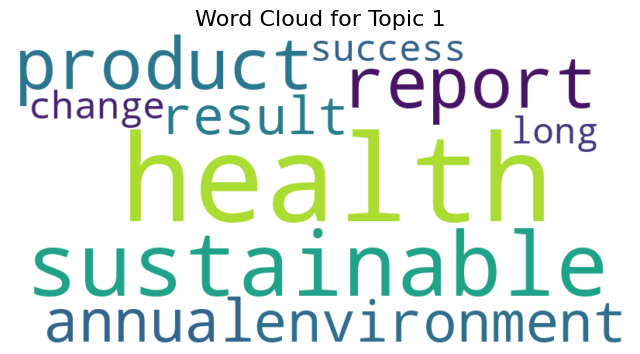

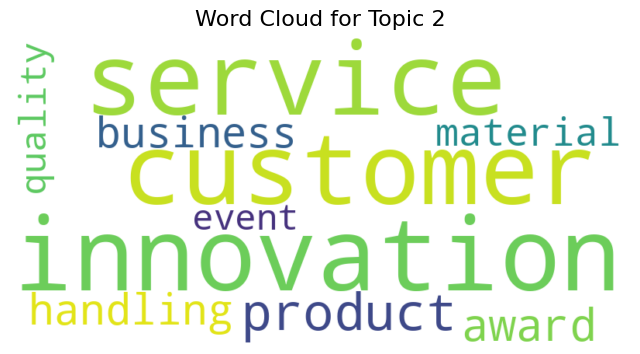

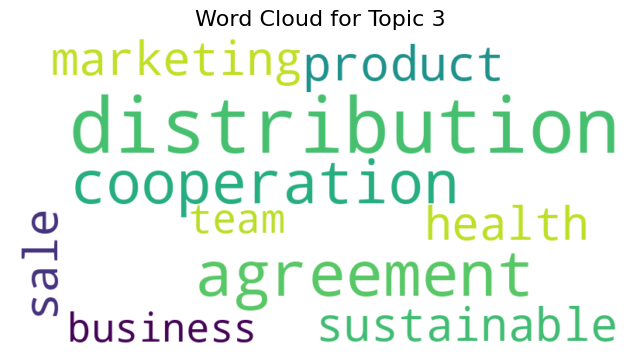

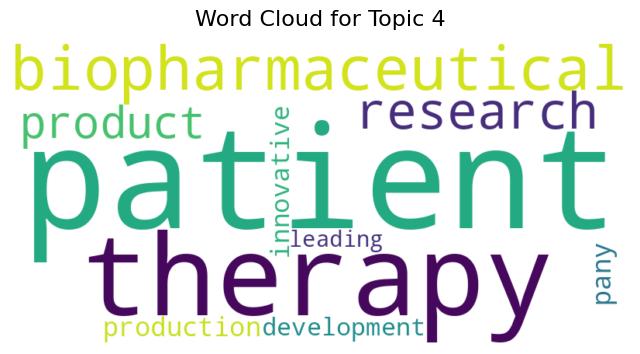

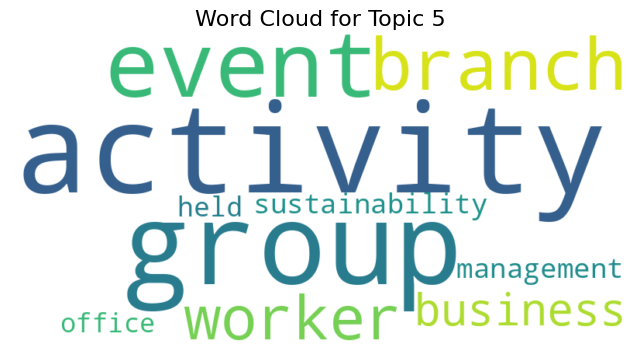

In [ ]:
# Function to get word frequencies for a topic
def frequencies_dict(lda_model, topic_idx, feature_names, top_n=10):
    """Generate a dictionary of word frequencies for a specific topic."""
    top_features_ind = lda_model.components_[topic_idx].argsort()[:-top_n - 1:-1]
    return {feature_names[i]: lda_model.components_[topic_idx][i] for i in top_features_ind}

# Function to generate and display a WordCloud for a topic
def make_image(frequencies, topic_idx):
    """Generate and display a WordCloud for a given topic."""
    wc = WordCloud(
        background_color="white",
        max_words=50,
        width=800,
        height=400,
        colormap="viridis"
    ).generate_from_frequencies(frequencies)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_idx + 1}", fontsize=16)
    plt.show()

# Feature names from CountVectorizer
feature_names = best_count_vectorizer.get_feature_names_out()

# Iterate through all topics and create WordClouds
for topic_idx in range(best_lda.n_components):
    freq = frequencies_dict(best_lda, topic_idx, feature_names)
    make_image(freq, topic_idx)
    print()
